In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [120]:
df = pd.read_csv('/Users/sergey/ds_bootcamp/ds-phase-0/RealEstate/RealEstbyMW/_data.csv')

Оставили толшько Москву так как "В качестве пилотного региона выбрана Москва"

In [121]:
# Удаляем строки из датафрейма, где столбец 'Адрес' начинается с 'Санкт-Петербург'
df.drop(df[df['Адрес'].str.startswith('Санкт-Петербург')].index, inplace=True)

# Удаляем строки из датафрейма, где столбец 'Адрес' начинается с 'Краснодарский край'
df.drop(df[df['Адрес'].str.startswith('Краснодарский край')].index, inplace=True)

df.shape

(19737, 25)

В качестве данных по площади, я решил оставить только общую площадь, так как она является максимально информативным показателем (на мой взгляд)
Так же для определения среднего показателя взята медиана, так как присутствуют выбросы(аномальные показатели).

In [122]:
# Этот код создает новый столбец 'Общая площадь' в датафрейме df
# Значения этого столбца получаются из первой части значений в столбце 'Площадь, м2',
# которые были разделены на несколько частей по символу "/" с помощью предыдущего метода split()
df['Общая площадь'] = df['Площадь, м2'].str.split('/').str.get(0).astype(float,)


# Здесь мы используем метод .agg для вычисления нескольких статистических показателей
# из столбца 'Общая площадь' в DataFrame df.
# Мы передаем список строковых значений ['median', 'min', 'max'] в качестве аргумента метода .agg,
# чтобы вычислить среднее значение, минимальное значение и максимальное значение этого столбца.

stats = df['Общая площадь'].agg(['median', 'min', 'max'])

print("Вашему вниманию представлены данные о площади сдаваемых квартр в г.Москва")
print("Средняя площадь, м2: ", stats['median'])
print("Минимальная площадь, м2: ", stats['min'])
print("Максимальная площадь, м2: ", stats['max'])






Вашему вниманию представлены данные о площади сдаваемых квартр в г.Москва
Средняя площадь, м2:  49.8
Минимальная площадь, м2:  7.0
Максимальная площадь, м2:  811.0


Здесь была оставлена только стоимость аренды жтлья без учета таких критериев как: залог, коммунальные платежи, и др.
Здесь так же для определения среднего показателя взята медиана, так как присутствуют выбросы(аномальные показатели), которые искажают данные.

In [123]:
# Этот код разбивает значения в столбце 'Цена' на отдельные фрагменты по точке
# Разделитель точка передается в метод split()
# Затем метод get(0) извлекает первый фрагмент из каждого полученного значения, который содержит целую часть числа до точки
# Далее, метод astype(float) преобразует полученную строку с целой частью числа к типу float
# Результат сохраняется в новом объекте pandas Series, содержащем только целые части чисел из столбца 'Цена' в формате int
df['Цена аренды'] = df['Цена'].str.split('.').str.get(0).astype(int)

rent_stats = df['Цена аренды'].agg(['median', 'min', 'max'])

print("Вашему вниманию представлены данные о стоимости сдаваемых квартр в г.Москва")
print("Средняя цена аренды, тыс\руб: ", rent_stats['median'])
print("Минимальная цена аренды, тыс\руб: ", rent_stats['min'])
print("Максимальная цена аренды, тыс\руб: ", rent_stats['max'])


# sns.histplot(x='Цена аренды', data=df, bins=100, color='green')

Вашему вниманию представлены данные о стоимости сдаваемых квартр в г.Москва
Средняя цена аренды, тыс\руб:  50000.0
Минимальная цена аренды, тыс\руб:  5000.0
Максимальная цена аренды, тыс\руб:  3000000.0


In [124]:
# Создаем новый столбец 'Кол-во комнат' в датафрейме df
# Для каждой строки ставим значение - это первое число из строки в столбце 'Количество комнат', разделенной запятыми
# Преобразуем полученное значение в тип float и записываем его в новый столбец 'Кол-во комнат'
df['Кол-во комнат'] = df['Количество комнат'].str.split(',').str.get(0).astype(float)


Здесь мы убираем аномально мальенькую стоимость жилья (меньше 25_000) таких данных всего 120 строк и 
аномально большую стоимость (больше 800_000) таких данных так же около 120.
В связи с таким небольшим обьемом аномальных данных их количество не сильно повлияет но общие показатели!

In [125]:
# Этот код создает новый датафрейм, который содержит только строки из исходного датафрейма `df`,
#  где значение в столбце `'Цена аренды'` меньше `25000`. 
# - Выражение `df['Цена аренды'] < 25000` возвращает логический массив, где каждый элемент обозначает,
#  меньше ли значение в столбце `'Цена аренды'` соответствующей строки указанного порогового значения (`25000`) 
# или нет.
# - Индексация квадратными скобками используется для фильтрации строк исходного датафрейма. 
# - Передача условия в квадратных скобках фильтрует строки, которые удовлетвор
# - Выражение `df['Цена аренды'] > 800_000` возвращает логический массив, где каждый элемент обозначает, 
# больше ли значение в столбце `'Цена аренды'` соответствующей строки указанного порогового значения (`800_000`) 
# или нет.

df['Цена аренды'].value_counts()
# mask= (df['Цена аренды'] 

# Создаем новый датафрейм, содержащий только строки с ценой аренды меньше 25000
df[df['Цена аренды'] < 25_000] # Таких всего 120 не значительно для всего обьема данных


# Создаем новый датафрейм, содержащий только строки с ценой аренды больше 800000
df[df['Цена аренды'] > 800_000]

mask = (df['Цена аренды'] > 800_000) | (df['Цена аренды'] < 25_000)

coast = df[~mask]




Text(0.5, 1.0, 'График колличества предложений на рынке по определенной цене')

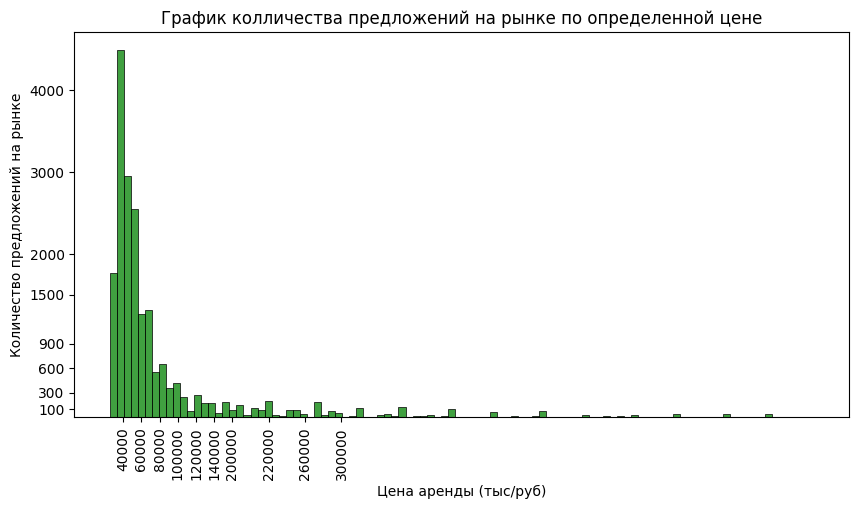

In [126]:
coast['Цена аренды']
plt.figure(figsize=(10,5))
sns.histplot(x='Цена аренды', data=coast, bins=100, color='green')
new_xticks = [40_000,60_000, 80_000, 100_000, 120_000, 140_000, 160_000, 200_000, 240_000, 280_000]
new_xticklabels = [40000, 60_000, 80_000, 100_000, 120_000, 140_000, 200_000, 220_000, 260_000, 300_000] 
plt.xticks(new_xticks, new_xticklabels)
plt.xticks(rotation=90)  
new_yticks = [100,300,600,900,1_500, 2_000, 3_000, 4_000]
plt.yticks(new_yticks)
plt.xlabel('Цена аренды (тыс/руб)')
plt.ylabel('Количество предложений на рынке' )
plt.title('График колличества предложений на рынке по определенной цене')

<Axes: title={'center': 'График зависимости цены щт площади(м2) и кол-ва комнат(шт)'}, xlabel='Цена аренды (тыс/руб)', ylabel='Площадь сдаваемой квартиры (м2)'>

<Figure size 1000x500 with 0 Axes>

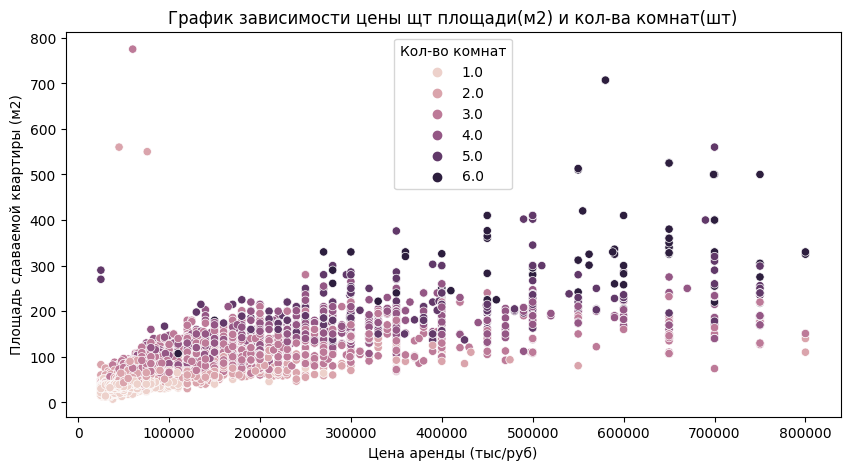

In [127]:
# Этот код группирует строки в датафрейме df по значениям столбцов 'Цена' и 'Общая площадь'
# Новый датафрейм new_df будет содержать уникальные комбинации значений этих двух столбцов
# as_index=False указывает, что новый датафрейм не должен использовать значения группировки в качестве индекса строк
# new_df = df.groupby(['Цена аренды', 'Общая площадь'], as_index=False)

new_df = coast[['Цена аренды','Общая площадь', 'Кол-во комнат']]
plt.figure(figsize=(10,5))
plt.figure(figsize=(10,5))
plt.xlabel('Цена аренды (тыс/руб)')
plt.ylabel('Площадь сдаваемой квартиры (м2)' )
plt.title('График зависимости цены щт площади(м2) и кол-ва комнат(шт)')
sns.scatterplot(data=coast, x='Цена аренды', y='Общая площадь', hue='Кол-во комнат')



Text(0.5, 1.0, 'График взаимосвязи цены аренды и площади сдаваемого жилья ')

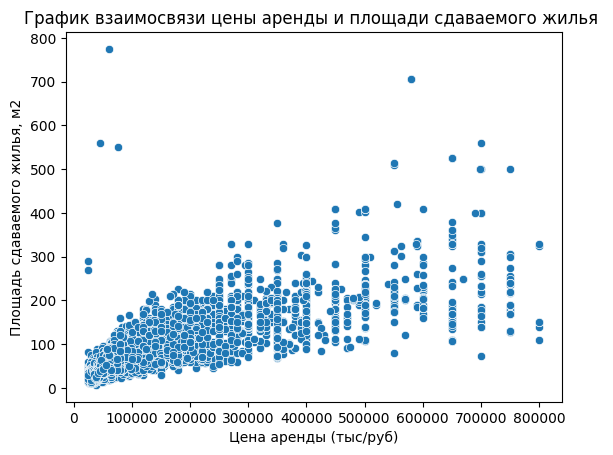

In [128]:
sns.scatterplot(data=coast, x='Цена аренды', y='Общая площадь')
plt.xlabel('Цена аренды (тыс/руб)')
plt.ylabel('Площадь сдаваемого жилья, м2' )
plt.title('График взаимосвязи цены аренды и площади сдаваемого жилья ')

Text(0.5, 1.0, 'График взаимосвязи цены аренды и количества комнат')

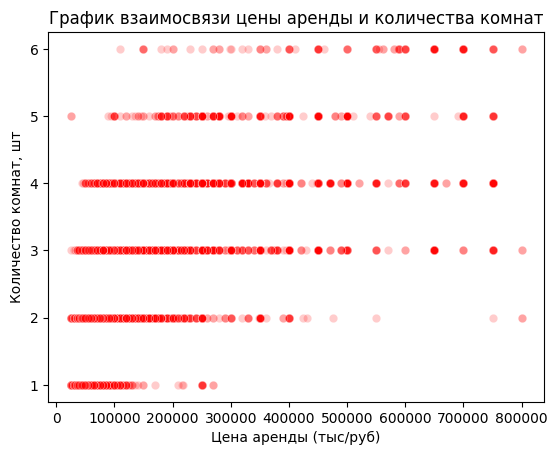

In [129]:
sns.scatterplot(data=coast, x='Цена аренды', y='Кол-во комнат', color='red', alpha=0.2)
plt.xlabel('Цена аренды (тыс/руб)')
plt.ylabel('Количество комнат, шт' )
plt.title('График взаимосвязи цены аренды и количества комнат')